
# Project: Investigating the No Show Appiontment Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil. The analysis is focused on the question of whether or not patients show up for their appointment. 

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv')

print ("Rows: ", df.shape[0])
print ("Columns: ", df.shape[1])
df.head()

Rows:  110527
Columns:  14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


no_show break down:
No     88208
Yes    22319
Name: No-show, dtype: int64
20.19 % did not show up.


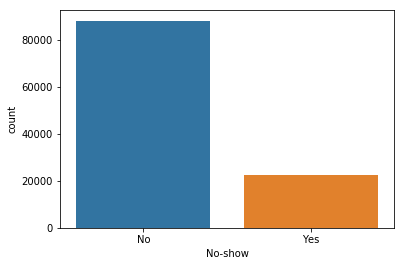

In [6]:
print("no_show break down:")
print (df['No-show'].value_counts())
prop = (df['No-show'].value_counts()[1])/ float(len(df['No-show'])) * 100
print(round(prop, 2),"% did not show up.")
sns.countplot(x='No-show',data=df)

### General Observations from properties review

<ul>
<li>The dataset is a total of 110,527 rows and 14 columns.</li>
<li>The dataset does not contain any missing values (NaNs).</li>
<li>There are 13 independent variables and one dependent (no_show) in the dataset.</li>
<li>The scheduled_day and appointment_day columns type should be changed to datetime.</li>
<li>Inconsistency and spelling errors were discovered in column names.</li>
<li>Outliers were discoverd in the age columns, The youngest patient is -1 years old and the oldest is 115.</li>
<li>The time between the scheduled day and the apiontment day though not given might be usefull in this analysis.</li>
<li>The day of the week would also be usefull.</li>
<li>20% of patients did no show up for their appiontments.</li>
<li>The PatientId and the AppointmentID would not be needed for this analsis and would be dropped.</li>
</ul>


### Data Cleaning

Fixing the inconsistency in column names and renaming columns as necessary

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
df.rename(columns={'Handcap':'handicap', 
                   'Hipertension':'Hypertension',
                   'No-show': 'no_show'}, 
          inplace=True
         )
df.columns = df.columns.str.lower()

In [9]:
#confirming the new column names
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

Converting scheduledday and appointmentday columns to datetime columns to allow for proper analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
import datetime as dt
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [13]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The both columns are now datetime columns but scheduleday column has timestamps while appointmentday does not have timestamps, I am going to remove the timestamps from scheduleday to enable uniformity on both columns.

In [14]:
df['scheduledday'] = df['scheduledday'].dt.floor('d')

In [15]:
#confirming the change
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Creating a new column that would determine the number of days between the day an appiontment was scheduled and the date of appiontment.

In [16]:
df['interval'] = ( df['appointmentday'] - df['scheduledday'])

In [17]:
#confriming the addition
df.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,interval
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41 days


Removing Outliers form the Age column

In [18]:
df[df['age'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,interval
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0 days


Only one row has an abnormal age of negative. we would be droping it.

In [19]:
df.drop(df[df['age'] < 0].index, inplace=True)

In [20]:
#confirming change
df[df['age'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,interval


Droping the PatientId and the AppointmentID columns

In [21]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns]
appointmentday    110526 non-null datetime64[ns]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hypertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handicap          110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null object
interval          110526 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(7), object(3), timedelta64[ns](1)
memory usage: 11.8+ MB


Creating a new column to show days of the week for appiontments

In [23]:
# Create weekday column
df['weekday'] = df.appointmentday.dt.weekday_name

# Check the values
df['weekday'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: weekday, dtype: int64

In [24]:
df.groupby('weekday')['no_show'].value_counts()

weekday    no_show
Friday     No         14982
           Yes         4037
Monday     No         18024
           Yes         4690
Saturday   No            30
           Yes            9
Thursday   No         13909
           Yes         3338
Tuesday    No         20488
           Yes         5152
Wednesday  No         20774
           Yes         5093
Name: no_show, dtype: int64

The first 3days of the week (Monday, Tuesday, Wednesday) have higher appiontments than other weekdays. There are 24 visits on Saturday and none on Sunday.

In [25]:
df.groupby('gender')['no_show'].value_counts()

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [26]:
#df.groupby('SMS_received')['No-show'].value_counts()

<a id='eda'></a>
## Exploratory Data Analysis


### 1. How many patients missed their appiontment?

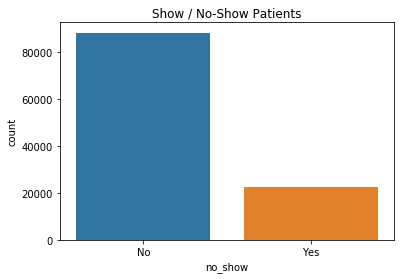

20.19% of appointments were missed.


In [27]:
ax = sns.countplot(x=df.no_show, data=df)
ax.set_title("Show / No-Show Patients")
plt.show();

print('{}% of appointments were missed.'.format(round(prop, 2)))

### 2. What is the distribution of the independent variables in the dataset?

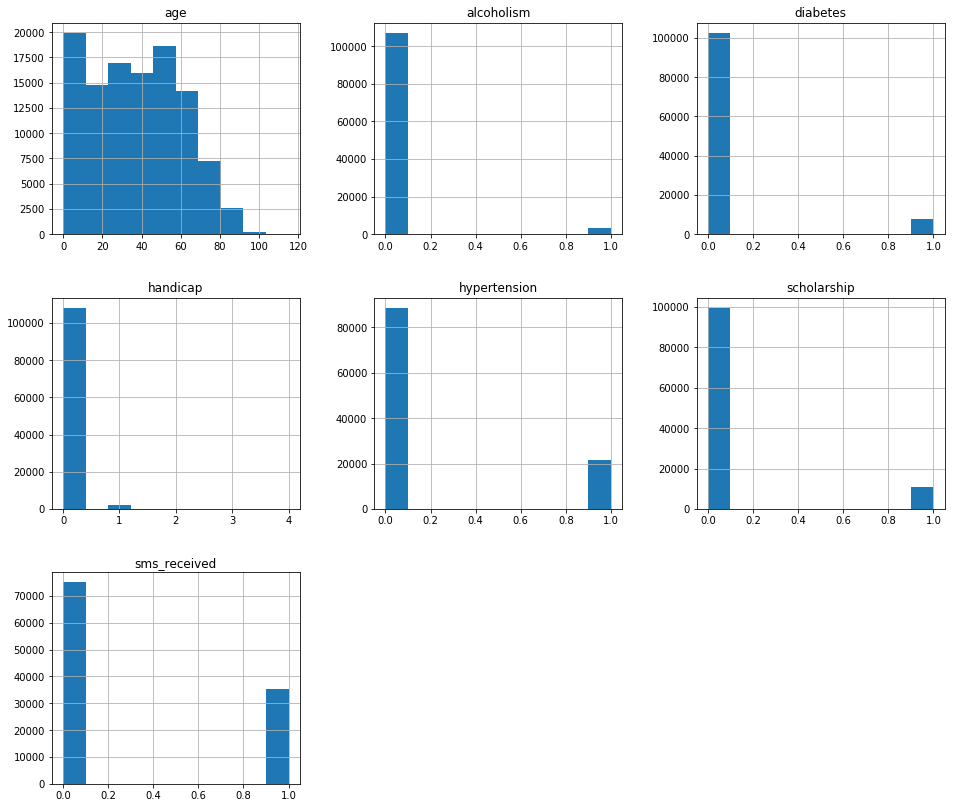

In [28]:
df.hist(figsize=(16,14))
plt.show()

### 3. What is the proportion of patients with each precondition did not show up.

In [29]:
# I created a function that would calculate the proportion of missed appiontments and also plot a histograph of both
def distr( var ):
    prop = round((df[var].value_counts()[1])/ float(len(df[var])) * 100, 2)
    ax = sns.countplot(x=var, hue=df.no_show, data=df)
    ax.set_title("Show / No-Show for {}".format(var))
    plt.show();
    
    print('{}% of appointments for patients with {} were missed.'.format(prop, var))
    return

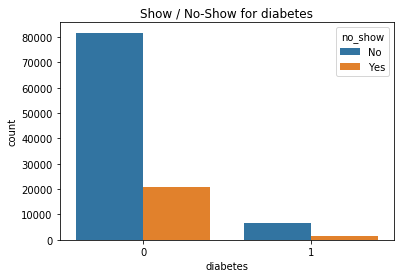

7.19% of appointments for patients with diabetes were missed.


In [30]:
#Proportion of patients with diabetes that did not show up
distr('diabetes')

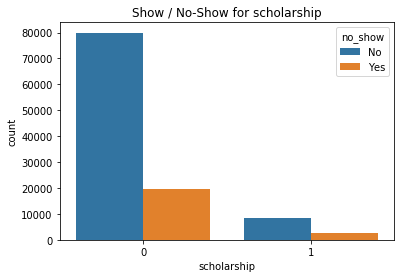

9.83% of appointments for patients with scholarship were missed.


In [31]:
#Proportion of patients with scholarship that did not show up
distr('scholarship')

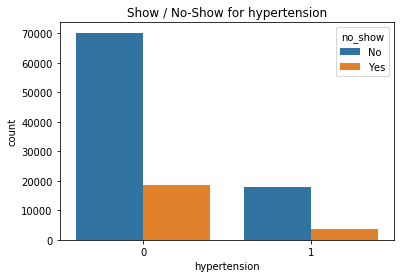

19.72% of appointments for patients with hypertension were missed.


In [32]:
#Proportion of patients with hypertension that did not show up
distr('hypertension')

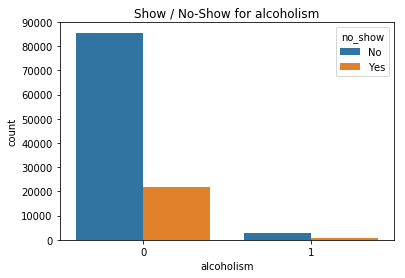

3.04% of appointments for patients with alcoholism were missed.


In [33]:
#Proportion of patients with alcoholism that did not show up
distr('alcoholism')

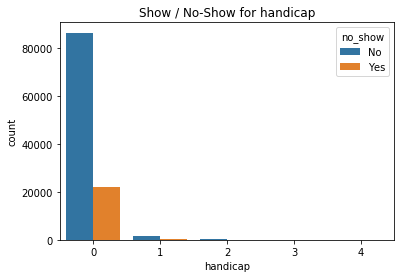

1.85% of appointments for patients with handicap were missed.


In [34]:
#Proportion of patients with handicap that did not show up
distr('handicap')

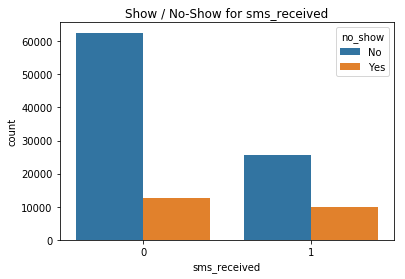

32.1% of appointments for patients with sms_received were missed.


In [35]:
#Proportion of patients with sms_received that did not show up
distr('sms_received')

### 4. What is the gender distribution for show / no-show patients?

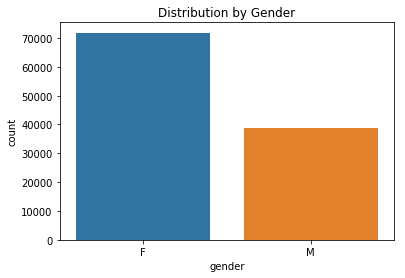

65.0% of patients were female.


In [36]:
sns.countplot(x=df.gender, data=df).set_title("Distribution by Gender")
plt.show()
prop = (df['gender'].value_counts()[0])/ float(len(df['gender'])) * 100
print('{}% of patients were female.'.format(round(prop, 2)))


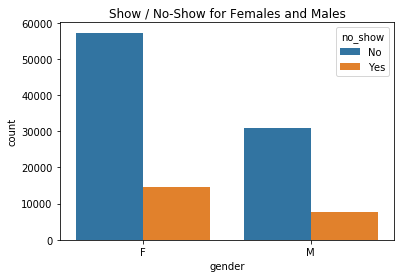

20% were missed by females.
20% were missed by males.


In [37]:
 #What is the gender distribution for show / no-show patients?
f_app = len(df.loc[df['gender'] == "F"])
m_app = len(df.loc[df['gender'] == "M"])

f_mis = len(df.query('no_show == "Yes" and gender == "F"'))
m_mis = len(df.loc[(df['gender'] == "M") & (df['no_show'] == "Yes")])

prop_f = int(round(f_mis/f_app*100))
prop_m = int(round(m_mis/m_app*100))

ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('{}% were missed by females.'.format(prop_f))
print('{}% were missed by males.'.format(prop_m))

### 5. Does neighbourhood affect the rate of missed appiontments?

In [38]:
df['neighbourhood'].nunique()

81

In [39]:
#Top 10 neighbourhood with highest patients
df.groupby('neighbourhood')['no_show'].count().sort_values(ascending = False).head(10)

neighbourhood
JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: no_show, dtype: int64

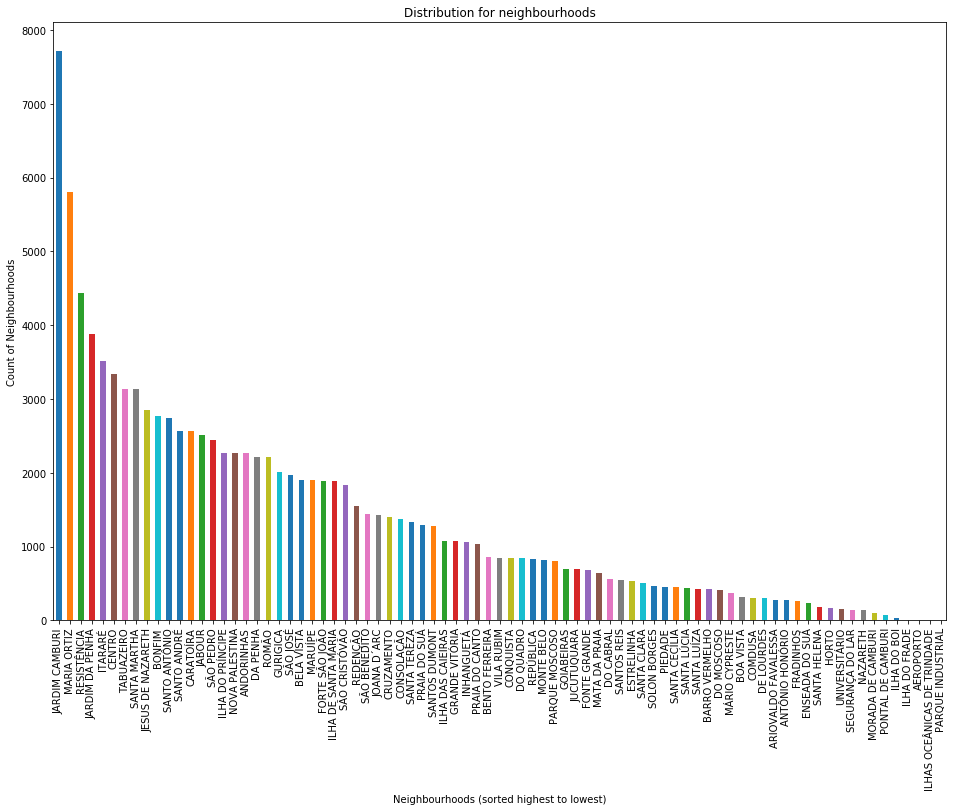

In [40]:
#Distribution of patents by neigbourhoods
fig = plt.figure(figsize=(16, 11))
ax=df['neighbourhood'].value_counts().plot(kind="bar")
ax.set_title("Distribution for neighbourhoods")
ax.set_xlabel("Neighbourhoods (sorted highest to lowest)")
ax.set_ylabel("Count of Neighbourhoods")
plt.show();

In [41]:
#spliting the dataframe into two, show and noshow
showed = df.no_show == 'No'
not_showed = df.no_show == 'Yes'


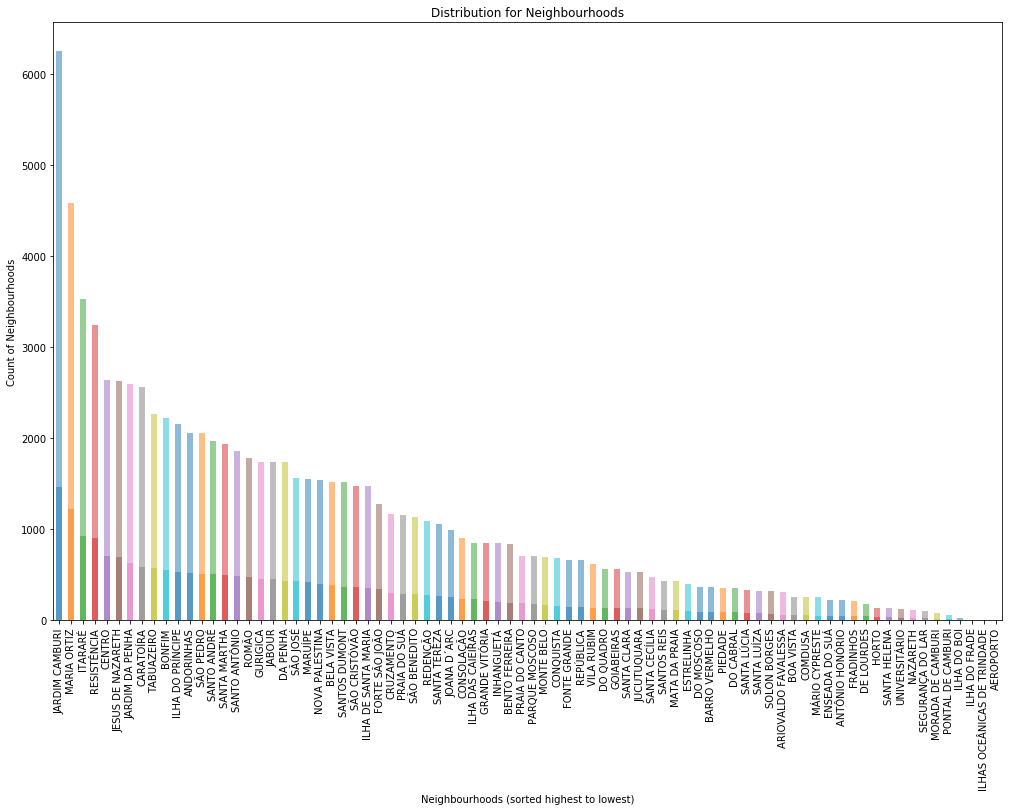

In [42]:
#ploting a barchart showing both the missed and not missed appiontments
fig = plt.figure(figsize=(17, 11))
ax=df.neighbourhood[showed].value_counts().plot(kind="bar",alpha=0.5)
ax=df.neighbourhood[not_showed].value_counts().plot(kind="bar",alpha=0.5)
ax.set_title("Distribution for Neighbourhoods")
ax.set_xlabel("Neighbourhoods (sorted highest to lowest)")
ax.set_ylabel("Count of Neighbourhoods")
plt.show()

### 6. Does the time difference between the date an appiontment was booked and the actual appiontment day affect the show and no show rate?

In [43]:
df['interval'].nunique()

131

In [44]:
df['interval'].describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: interval, dtype: object

In [45]:
df['interval'].value_counts().head(20)

0 days     38562
2 days      6725
4 days      5290
1 days      5213
7 days      4906
6 days      4037
5 days      3277
14 days     2913
3 days      2737
8 days      2332
21 days     1861
28 days     1706
13 days     1682
9 days      1605
15 days     1503
10 days     1391
20 days     1187
22 days     1173
16 days     1151
12 days     1115
Name: interval, dtype: int64

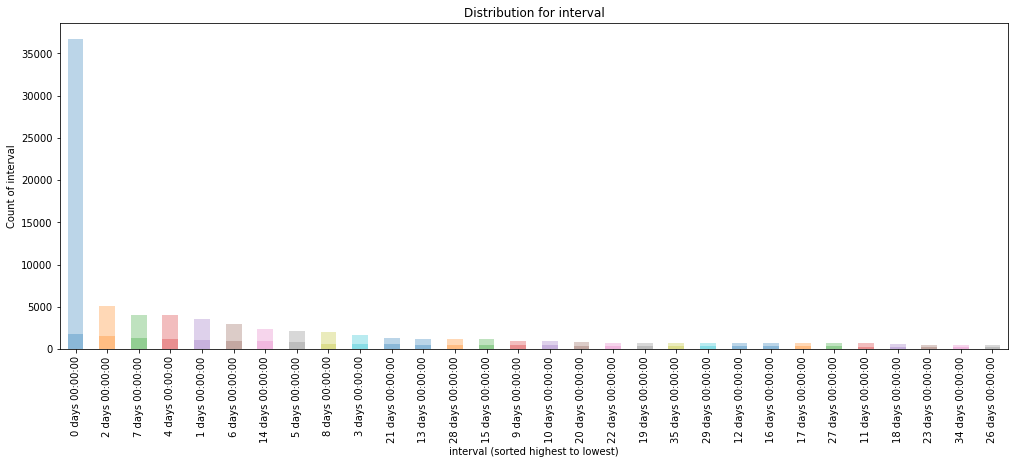

In [46]:
#ploting a barchart showing both the missed and not missed appiontments
fig = plt.figure(figsize=(17, 6))
ax=df.interval[showed].value_counts().head(30).plot(kind="bar",alpha=0.3)
ax=df.interval[not_showed].value_counts().head(30).plot(kind="bar",alpha=0.3)
ax.set_title("Distribution for interval")
ax.set_xlabel("interval (sorted highest to lowest)")
ax.set_ylabel("Count of interval")
plt.show()

### 7. Does the Day of the Week affect the no show rate.

In [47]:
df['weekday'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: weekday, dtype: int64

In [48]:
#function to calculate the percentage of missed appiontments
def prop(value, col):
    tapp = len(df.loc[df[col] == value])
    miapp = len(df.loc[(df[col] == value) & (df['no_show'] == "Yes")])
    prop_f = int(round(miapp/tapp*100))
    print('{}% of {} missed their appiontments.'.format(prop_f,value))
    return 

In [49]:
#calculating the percentage of missed their appiontments by days of the week
prop('Monday','weekday')
prop('Tuesday', 'weekday')
prop('Wednesday', 'weekday')
prop('Thursday', 'weekday')
prop('Friday', 'weekday')
prop('Saturday', 'weekday')

21% of Monday missed their appiontments.
20% of Tuesday missed their appiontments.
20% of Wednesday missed their appiontments.
19% of Thursday missed their appiontments.
21% of Friday missed their appiontments.
23% of Saturday missed their appiontments.


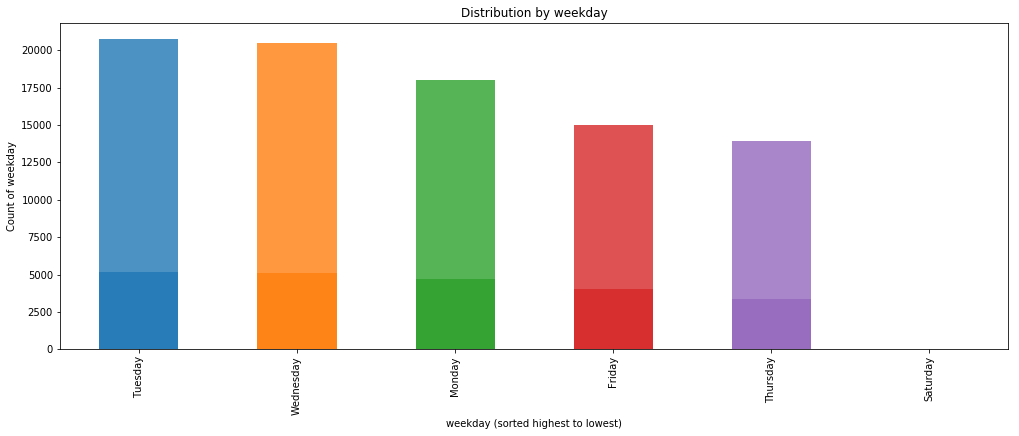

In [50]:
fig = plt.figure(figsize=(17, 6))
ax=df.weekday[showed].value_counts().plot(kind="bar",alpha=0.8)
ax=df.weekday[not_showed].value_counts().plot(kind="bar",alpha=0.8)
ax.set_title("Distribution by weekday")
ax.set_xlabel("weekday (sorted highest to lowest)")
ax.set_ylabel("Count of weekday")
plt.show()

### 8. Does the Age of the patient affect the rate of no show?

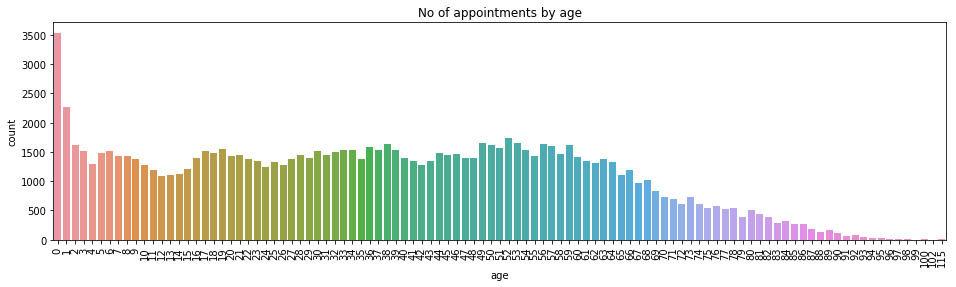

In [51]:
# Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("No of appointments by age")
plt.show()

In [52]:
#to make the plot clearer lets group the age into ranges/bins
def ageRange (x):
    if x < 0 : return 'invalid'
    elif x >=0 and x < 6 : return 'young_children'
    elif x >=6 and x < 12 : return 'Pre-teens'
    elif x >=12 and x < 19 : return 'teens'
    elif x >=19 and x < 35 : return 'youths'
    elif x >=35 and x < 65 : return 'adults'
    else: return 'elderly'

df['ageclass']= df['age'].apply(ageRange)

In [53]:
df['ageclass'].value_counts()

adults            44499
youths            22759
elderly           14402
young_children    11731
teens              8922
Pre-teens          8213
Name: ageclass, dtype: int64

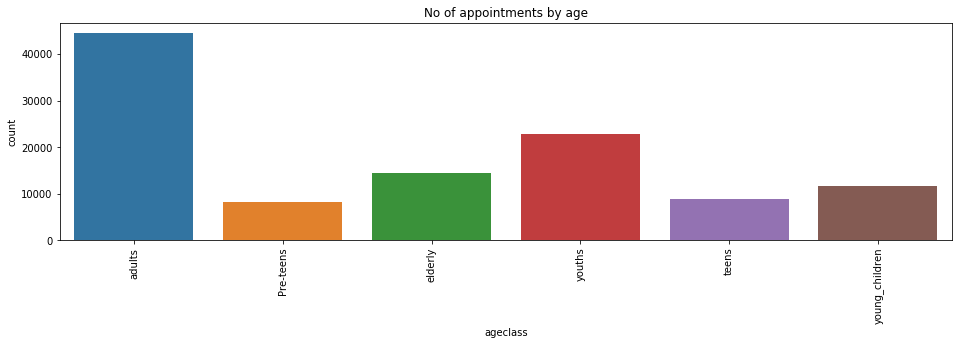

In [54]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.ageclass)
ax.set_title("No of appointments by age")
plt.show()

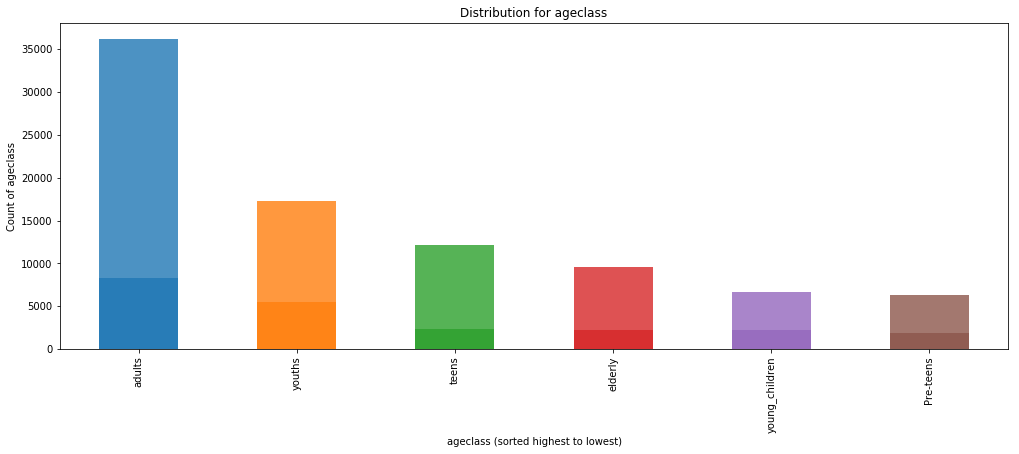

In [55]:
#ploting a barchart showing both the missed and not missed appiontments
fig = plt.figure(figsize=(17, 6))
ax=df.ageclass[showed].value_counts().plot(kind="bar",alpha=0.8)
ax=df.ageclass[not_showed].value_counts().plot(kind="bar",alpha=0.8)
ax.set_title("Distribution for ageclass")
ax.set_xlabel("ageclass (sorted highest to lowest)")
ax.set_ylabel("Count of ageclass")
plt.show()

In [56]:
#calculating the percentage of each age class that missed their appiontments
prop('adults','ageclass')
prop('youths', 'ageclass')
prop('teens', 'ageclass')
prop('elderly', 'ageclass')
prop('young_children', 'ageclass')
prop('Pre-teens', 'ageclass')

19% of adults missed their appiontments.
24% of youths missed their appiontments.
26% of teens missed their appiontments.
16% of elderly missed their appiontments.
19% of young_children missed their appiontments.
23% of Pre-teens missed their appiontments.


<a id='conclusions'></a>
## Conclusions

Having gone through the dataset, the following conclusions can be safely drawn
    - The distribution of appointments among days of week (Monday-Friday) is almost equal with a little bit less visits on Thursday and Friday. There are 39 visits on Saturday and none on Sunday.
    - Sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come, this is because there was no significant difference between those that received sms and those that did not.
    - The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
    - On average, 20% of appointments were missed.
    - Gender had no impact on the data as both male and female patients had the same proportion of missed appiontments.
    - Teens and youths are more likely to miss their appiontments than the elderly.
    - Patients are more likely to show up if the time interval between the scheduledday and	appointmentday a less. the higher the days inbetween the more likely the patients would be a no show.
    - For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.
    
In summary, the data provided is insufficient to determine the rate of no-shows, more variables would be essencial such as Distance to the clinic, Weather report, purpose of appiontments etc.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])